In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier

In [3]:
# Random seed for reproducibility
seed = 202
np.random.seed(seed)

In [4]:
# Import and plot the dataset
train_data = pd.read_csv("trainset.csv", delimiter=",")
train_data.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DataAllowanceOneShot,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,CustomerAge,EstimatedDevicePrice,...,Music-Streaming,Network-Operation,P2P-Applications,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications,Product
0,10930,1.0,0.156221,0.010514,NaN,1.0,0.018229,0.001623,"(40, 50]",0.445783,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,Non-Customer
1,10170,0.0,0.155086,0.054729,NaN,1.0,0.051432,0.001498,"(20, 30]",NaN,...,0.081846,0.000317,0.007060,0.002620,0.071551,0.0,0.001896,0.000058,0.775410,Non-Customer
2,1492,1.0,NaN,NaN,NaN,1.0,0.058594,0.001248,"(30, 40]",0.722892,...,0.033860,0.000001,0.000000,0.000228,0.099438,0.0,0.012055,0.003579,0.499158,Non-Customer
3,7424,1.0,0.155086,0.004987,NaN,1.0,0.097005,0.000499,"(50, 60]",0.397590,...,0.000000,0.000000,0.000001,0.000052,0.041474,0.0,0.051692,0.013263,0.301528,V-Bag
4,4332,1.0,0.155086,0.038148,NaN,1.0,0.034505,0.000375,"(60, 70]",0.156627,...,0.000000,0.000106,0.000001,0.000777,0.005975,0.0,0.000857,0.019149,0.926208,Non-Customer


In [5]:
# Plot the columns name
#train_data.columns

In [6]:
#train_data['CustomerAge'].unique()

In [7]:
# Reconstruct the feature CustomerAge
# (40,50] -> 45
# Then transform it into a dataframe column with named CustomerAge

customer_age = []
customer_age = train_data['CustomerAge']
#if isinstance(customer_age,str):
customer_age.replace({ 
    '(10, 20]' : int(15), 
    '(20, 30]' : int(25), 
    '(30, 40]' : int(35),
    '(40, 50]' : int(45),
    '(50, 60]' : int(55),
    '(60, 70]' : int(65),
    '(70, 80]' : int(75),
    '(80, 90]' : int(85)}, 
    inplace=True)

customer_age = np.asarray(customer_age)
customer_age = pd.DataFrame({'CustomerAge': customer_age})
customer_age.head()

,CustomerAge
0,45.0
1,25.0
2,35.0
3,55.0
4,65.0


In [66]:
# Remove the previous CustomerAge and then insert the new CustomerAge
train_data = train_data.drop('CustomerAge', axis=1)
train_data = train_data.join(customer_age)
train_data.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DataAllowanceOneShot,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,EstimatedDevicePrice,MonthlyDataTraffic,...,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications,Region,Province,Product,CustomerAge
0,10930,1.0,0.156221,0.010514,NaN,1.0,0.018229,0.001623,0.445783,0.011007,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,16.0,14.0,0,25.0
1,10170,0.0,0.155086,0.054729,NaN,1.0,0.051432,0.001498,NaN,0.039382,...,0.002620,0.071551,0.0,0.001896,0.000058,0.775410,NaN,NaN,0,25.0
2,1492,1.0,NaN,NaN,NaN,1.0,0.058594,0.001248,0.722892,0.033031,...,0.000228,0.099438,0.0,0.012055,0.003579,0.499158,NaN,NaN,0,55.0
3,7424,1.0,0.155086,0.004987,NaN,1.0,0.097005,0.000499,0.397590,0.002928,...,0.000052,0.041474,0.0,0.051692,0.013263,0.301528,8.0,15.0,1,NaN
4,4332,1.0,0.155086,0.038148,NaN,1.0,0.034505,0.000375,0.156627,0.001002,...,0.000777,0.005975,0.0,0.000857,0.019149,0.926208,19.0,103.0,0,35.0


c'è da convertire tutte le features per renderle leggibili per un modello di machine learning
nella fattispecie, bisogna convertire ogni colonna di stringhe in float/int
decidere cosa fare con i nan

In [9]:
# Find all the unique product in column Product
#train_data.Product.unique()

In [10]:
# ARPU stand for "Average Revenue Per Unit"
#train_data.DataArpu.head()*100

In [11]:
#games = []
#games = train_data.Games
#max(games*100)
#train_data.describe()

In [12]:
#The Churn Score predicted for each customer, 
#which is the predicted chance of the customer leaving the company in the upcoming month.
#churn = train_data.ChurnScore
#churn.head()*100

In [13]:
#Take all unique Regions, assigns to each region alphabetically ordered a monotonic growing number
regions_sort = sorted(train_data['Region'].dropna().unique())
#regions_len = len(regions_sort) #20 Regions

mapping = {}
for val, idx in enumerate(regions_sort):
    mapping[idx] = val
    
regions = train_data['Region']
regions.replace(mapping, inplace=True)

#print(mapping, regions)
regions = np.asarray(regions)
regions = pd.DataFrame({'Region': regions})
regions.head()

,Region
0,16.0
1,NaN
2,NaN
3,8.0
4,19.0


In [14]:
#Take all unique Provinces, assigns to each province alphabetically ordered a monotonic growing number
provinces_sort = sorted(train_data['Province'].dropna().unique())
provinces_len = len(provinces_sort) #110 Provinces

mapping = {}
for val, idx in enumerate(provinces_sort):
    mapping[idx] = val
    
provinces = train_data['Province']
provinces.replace(mapping, inplace=True)


#print(provinces_sort, provinces_len)
#print(mapping, provinces)
provinces = np.asarray(provinces)
provinces = pd.DataFrame({'Province': provinces})
provinces.head()

,Province
0,14.0
1,NaN
2,NaN
3,15.0
4,103.0


In [15]:
# Remove the previous Region and Province columns and then insert the new Region and Province
train_data = train_data.drop('Region', axis=1)
train_data = train_data.drop('Province', axis=1)
train_data = train_data.join(regions)
train_data = train_data.join(provinces)
train_data.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DataAllowanceOneShot,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,EstimatedDevicePrice,MonthlyDataTraffic,...,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications,Product,CustomerAge,Region,Province
0,10930,1.0,0.156221,0.010514,NaN,1.0,0.018229,0.001623,0.445783,0.011007,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,Non-Customer,45.0,16.0,14.0
1,10170,0.0,0.155086,0.054729,NaN,1.0,0.051432,0.001498,NaN,0.039382,...,0.002620,0.071551,0.0,0.001896,0.000058,0.775410,Non-Customer,25.0,NaN,NaN
2,1492,1.0,NaN,NaN,NaN,1.0,0.058594,0.001248,0.722892,0.033031,...,0.000228,0.099438,0.0,0.012055,0.003579,0.499158,Non-Customer,35.0,NaN,NaN
3,7424,1.0,0.155086,0.004987,NaN,1.0,0.097005,0.000499,0.397590,0.002928,...,0.000052,0.041474,0.0,0.051692,0.013263,0.301528,V-Bag,55.0,8.0,15.0
4,4332,1.0,0.155086,0.038148,NaN,1.0,0.034505,0.000375,0.156627,0.001002,...,0.000777,0.005975,0.0,0.000857,0.019149,0.926208,Non-Customer,65.0,19.0,103.0


In [16]:
#train_data.groupby('Province').count()

In [17]:
# Replace all products str in integer
product = []
product = train_data.Product
product.replace({ 
    'Non-Customer' : int(0), 
    'V-Bag': int(1), 
    'V-Pet' : int(2), 
    'V-Auto' : int(3)},
    inplace=True)

product = np.asarray(product)
product = pd.DataFrame({'Product': product})
product.head()

,Product
0,0
1,0
2,0
3,1
4,0


In [18]:
# Remove the previous Product column and then add the new Product column
train_data = train_data.drop('Product', axis=1)
train_data = train_data.join(product)
train_data.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DataAllowanceOneShot,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,EstimatedDevicePrice,MonthlyDataTraffic,...,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications,CustomerAge,Region,Province,Product
0,10930,1.0,0.156221,0.010514,NaN,1.0,0.018229,0.001623,0.445783,0.011007,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,45.0,16.0,14.0,0
1,10170,0.0,0.155086,0.054729,NaN,1.0,0.051432,0.001498,NaN,0.039382,...,0.002620,0.071551,0.0,0.001896,0.000058,0.775410,25.0,NaN,NaN,0
2,1492,1.0,NaN,NaN,NaN,1.0,0.058594,0.001248,0.722892,0.033031,...,0.000228,0.099438,0.0,0.012055,0.003579,0.499158,35.0,NaN,NaN,0
3,7424,1.0,0.155086,0.004987,NaN,1.0,0.097005,0.000499,0.397590,0.002928,...,0.000052,0.041474,0.0,0.051692,0.013263,0.301528,55.0,8.0,15.0,1
4,4332,1.0,0.155086,0.038148,NaN,1.0,0.034505,0.000375,0.156627,0.001002,...,0.000777,0.005975,0.0,0.000857,0.019149,0.926208,65.0,19.0,103.0,0


In [19]:
# Check how many NaNs there are in each column, except for the label
# All the rows with NaN as label will be deleted    
train_data.isnull().sum()

ID                                   0
DeviceFlag4G                         0
DataArpu                          2225
DataAllowanceContinuous           1180
DataAllowanceOneShot              9126
DeviceFlagSmartphone                 0
MonthlyVoiceTrafficCount           339
MonthlySMSTrafficCount             339
EstimatedDevicePrice              5694
MonthlyDataTraffic                 339
CustomerGender                       0
CustomerExpatriate                   0
ZipCode                           1726
ChurnScore                         869
AirportConnectionsDuration           0
AirportConnectionsCount              0
StationConnectionsDuration           0
StationConnectionsCount              0
ParkingConnectionsDuration           0
ParkingConnectionsCount              0
File-Transfer                        0
Games                                0
Instant-Messaging-Applications       0
Mail                                 0
Music-Streaming                      0
Network-Operation        

In [20]:
prova = train_data
prova = prova.drop('DataAllowanceOneShot', axis=1)
prova = prova.drop('EstimatedDevicePrice', axis=1)
prova = prova.dropna()

In [21]:
prova.shape

(6160, 35)

In [22]:
prova = prova.iloc[np.random.permutation(len(prova))]
prova = prova.reset_index(drop=True)

Test di correlazione chiquadro

In [23]:
array = np.asarray(prova)

X = array[:,0:prova.shape[1]-1]
X = np.asarray(X)
Y = array[:,prova.shape[1]-1]
Y = np.asarray(Y)

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X,Y)

In [25]:
# summarize scores
np.set_printoptions(precision=1)
print(fit.scores_)
features = fit.transform(X)

[6.3e+03 5.3e+00 6.1e+00 1.1e+01 4.2e-01 8.7e+00 8.0e-01 1.2e+01 8.0e+01
 1.1e+01 1.9e+06 2.0e+00 3.9e+01 4.0e+01 3.9e+01 3.8e+01 7.9e+01 8.6e+01
 1.3e+01 3.6e-01 3.7e-01 2.2e+00 7.8e+00 1.8e-02 2.8e+00 4.1e+00 2.4e+01
 2.8e+00 1.6e-01 2.9e-01 4.1e+01 2.0e+02 3.7e+01 2.8e+02]


In [26]:
prova.columns

Index(['ID', 'DeviceFlag4G', 'DataArpu', 'DataAllowanceContinuous',
       'DeviceFlagSmartphone', 'MonthlyVoiceTrafficCount',
       'MonthlySMSTrafficCount', 'MonthlyDataTraffic', 'CustomerGender',
       'CustomerExpatriate', 'ZipCode', 'ChurnScore',
       'AirportConnectionsDuration', 'AirportConnectionsCount',
       'StationConnectionsDuration', 'StationConnectionsCount',
       'ParkingConnectionsDuration', 'ParkingConnectionsCount',
       'File-Transfer', 'Games', 'Instant-Messaging-Applications', 'Mail',
       'Music-Streaming', 'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications', 'CustomerAge', 'Region', 'Province', 'Product'],
      dtype='object')

In [ ]:
'''

MISSING VALUES FOR COLUMN IN THE TEST SET

DataArpu                           757
DataAllowanceContinuous            388
DataAllowanceOneShot              3052

MonthlyVoiceTrafficCount           110
MonthlySMSTrafficCount             110
CustomerAge                        131
EstimatedDevicePrice              1900
MonthlyDataTraffic                 110

Province                           666
Region                             666
ZipCode                            575
ChurnScore                         303
'''

In [32]:
def features_labels_split(data):
    
    features = data[['ID', 'DataAllowanceContinuous', 'MonthlyDataTraffic', 'CustomerGender',
                     'CustomerExpatriate', 'ZipCode', 'Web-Applications', 'CustomerAge', 'Region', 'Province']]
    labels = data['Product']
    return features, labels

In [54]:
def features_labels_split(data):
    
    features = data[['ID', 'DeviceFlag4G', 
       'DeviceFlagSmartphone',   'CustomerGender',
       'CustomerExpatriate', 
       'AirportConnectionsDuration', 'AirportConnectionsCount',
       'StationConnectionsDuration', 'StationConnectionsCount',
       'ParkingConnectionsDuration', 'ParkingConnectionsCount',
       'File-Transfer', 'Games', 'Instant-Messaging-Applications', 'Mail',
       'Music-Streaming', 'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications']]
    labels = data['Product']
    return features, labels

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def standardize_features(features):

    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)
    return features

In [56]:
def train_test_validation_split(features, labels, val_samples, test_samples):

    features = np.asarray(features)
    labels =np.asarray(labels)
    
    X_test = features[0:test_samples]
    y_test = labels[0:test_samples]

    X_val = features[test_samples:test_samples + val_samples]
    y_val = labels[test_samples:test_samples + val_samples]

    X_train = features[test_samples + val_samples:]
    y_train = labels[test_samples + val_samples:]

    return X_train, X_test, X_val, y_train, y_test, y_val

Toy example

In [73]:
train_feat, train_label = features_labels_split(prova)
#train_feat = standardize_features(train_feat)

In [74]:
num_val_samples = 0
num_test_samples = 616
X_train, X_test, X_val, y_train, y_test, y_val = train_test_validation_split(train_feat, train_label, num_val_samples, num_test_samples)

In [32]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [50]:
# kFOLD

folds = 10
scores = []


kf = KFold(n_splits=folds, shuffle=True)
print(kf)
for train_index, test_index in kf.split(X_train):
    X_train_kF, X_test_kF = X_train[train_index], X_train[test_index]
    y_train_kF, y_test_kF = y_train[train_index], y_train[test_index]
    model_kF = RandomForestClassifier()
    model_kF.fit(X_train_kF, y_train_kF)
    pred = model_kF.predict(X_test_kF)
    f1 = f1_score(y_test_kF, pred, average='micro')
    scores.append(f1)
    print("F1 score: %.3f" % f1)
print("\nThe final F1 score is %.3f (+/- %.3f)" % (np.mean(scores), np.std(scores)))

KFold(n_splits=10, random_state=None, shuffle=True)
F1 score: 0.656
F1 score: 0.631
F1 score: 0.634
F1 score: 0.652
F1 score: 0.646
F1 score: 0.673
F1 score: 0.661
F1 score: 0.623
F1 score: 0.630
F1 score: 0.623

The final F1 score is 0.643 (+/- 0.016)


SOLO per avre un'idea di come dovrebbe performare su dati non visti

In [43]:
# Test Performance

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# F1
print("F1 score on unseen data: %.3f" % f1_score(y_test, y_pred, average='micro'))

F1 score on unseen data: 0.648


In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [36]:
# Build the default models to select the best one  
# The commented classifiers are weak
dtc = DecisionTreeClassifier()
bnb = BernoulliNB()
xtc = ExtraTreesClassifier()
nb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
#gpc = GaussianProcessClassifier() #Too fucking slow
perc = Perceptron()
paggr = PassiveAggressiveClassifier()
svc = SVC()
lsvc = LinearSVC()
sgd = SGDClassifier()
rnc = RadiusNeighborsClassifier(radius=2)



# Append all the models into an array
models = []
models.append(('RNC', rnc))
models.append(('SGD', sgd))
models.append(('SVC', svc))
models.append(('LSVC', lsvc))
models.append(('PAGGR', paggr))
models.append(('PERC', perc))
models.append(('LR', lr))
models.append(('LDA', lda))
models.append(('KNN', knn))
models.append(('DTC', dtc))
models.append(('NB', nb))
models.append(('GBC', gbc))
models.append(('RF', rf))
models.append(('ADA', ada))
models.append(('QDA', qda))
models.append(('BNB', bnb))
models.append(('XTC', xtc))



RNC: 0.672 (0.015)
SGD: 0.638 (0.030)
SVC: 0.672 (0.015)
LSVC: 0.673 (0.016)
PAGGR: 0.506 (0.145)
PERC: 0.478 (0.152)
LR: 0.672 (0.018)
LDA: 0.670 (0.016)
KNN: 0.651 (0.014)
DTC: 0.540 (0.017)
NB: 0.598 (0.012)
GBC: 0.680 (0.018)
RF: 0.658 (0.014)
ADA: 0.667 (0.012)
QDA: 0.601 (0.015)
BNB: 0.455 (0.012)
XTC: 0.657 (0.009)


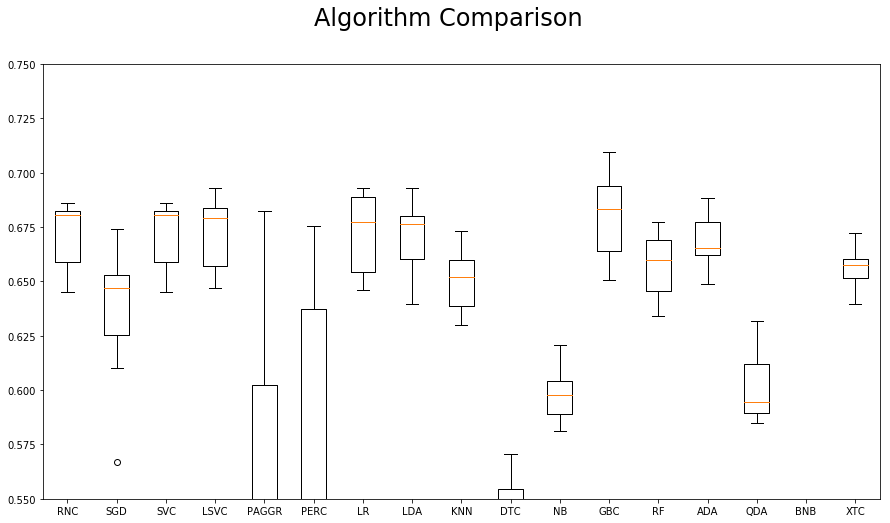

In [37]:
from sklearn.model_selection import cross_val_score


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_micro', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm Comparison', fontsize=24)
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
plt.ylim([0.55,0.75])
ax.set_xticklabels(names)
plt.show()

In [135]:
# Proviamo a potenziare il Gaussian Process Classifier!

# kFOLD

folds = 10
scores = []


kf = KFold(n_splits=folds, shuffle=False)
print(kf)
for train_index, test_index in kf.split(X_train):
    X_train_kF, X_test_kF = X_train[train_index], X_train[test_index]
    y_train_kF, y_test_kF = y_train[train_index], y_train[test_index]
    model_kF = GradientBoostingClassifier()
    model_kF.fit(X_train_kF, y_train_kF)
    pred = model_kF.predict(X_test_kF)
    f1 = f1_score(y_test_kF, pred, average='micro')
    scores.append(f1)
    print("F1 score: %.3f" % f1)
print("\nThe final F1 score is %.3f (+/- %.3f)" % (np.mean(scores), np.std(scores)))

KFold(n_splits=10, random_state=None, shuffle=False)
F1 score: 0.649
F1 score: 0.672
F1 score: 0.640
F1 score: 0.676
F1 score: 0.664
F1 score: 0.653
F1 score: 0.664
F1 score: 0.684
F1 score: 0.671
F1 score: 0.677

The final F1 score is 0.665 (+/- 0.013)


In [76]:
# Test Performance

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# F1
print("F1 score on unseen data: %.3f" % f1_score(y_test, y_pred, average='micro'))

F1 score on unseen data: 0.661


Da questo punto in avanti, riapplichiamo le stesse trasformazioni che abbiamo appricato al train per fare la predizione sul testset

In [61]:
# Import and plot the TEST dataset
test_data = pd.read_csv("testset.csv", delimiter=",")
test_data.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DataAllowanceOneShot,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,CustomerAge,EstimatedDevicePrice,...,Mail,Music-Streaming,Network-Operation,P2P-Applications,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications
0,271,0.0,0.155086,0.043853,NaN,1.0,0.268229,0.000375,"(20, 30]",NaN,...,0.002183,0.065390,0.000697,1.007375e-03,0.002989,0.322016,0.0,0.000576,0.000083,0.563506
1,6929,0.0,0.108560,0.021746,NaN,0.0,0.016927,0.000000,"(20, 30]",NaN,...,0.003745,0.004975,0.000310,2.141424e-07,0.000175,0.137171,0.0,0.000017,0.003834,0.692595
2,7381,0.0,0.263457,0.054729,NaN,1.0,0.050130,0.000000,"(50, 60]",NaN,...,0.001136,0.000422,0.000000,1.082646e-04,0.000357,0.355736,0.0,0.012133,0.005795,0.512938
3,4408,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,5440,1.0,0.309983,0.060434,NaN,1.0,0.079427,0.000999,"(30, 40]",NaN,...,0.009998,0.005942,0.000000,3.891126e-03,0.007870,0.689116,0.0,0.011202,0.003883,0.216666


In [62]:
test_data.isnull().sum()

ID                                   0
DeviceFlag4G                         0
DataArpu                           757
DataAllowanceContinuous            388
DataAllowanceOneShot              3052
DeviceFlagSmartphone                 0
MonthlyVoiceTrafficCount           110
MonthlySMSTrafficCount             110
CustomerAge                        131
EstimatedDevicePrice              1900
MonthlyDataTraffic                 110
CustomerGender                       0
CustomerExpatriate                   0
Province                           666
Region                             666
ZipCode                            575
ChurnScore                         303
AirportConnectionsDuration           0
AirportConnectionsCount              0
StationConnectionsDuration           0
StationConnectionsCount              0
ParkingConnectionsDuration           0
ParkingConnectionsCount              0
File-Transfer                        0
Games                                0
Instant-Messaging-Applica

In [63]:
customer_age = []
customer_age = test_data['CustomerAge']
#if isinstance(customer_age,str):
customer_age.replace({ 
    '(10, 20]' : int(15), 
    '(20, 30]' : int(25), 
    '(30, 40]' : int(35),
    '(40, 50]' : int(45),
    '(50, 60]' : int(55),
    '(60, 70]' : int(65),
    '(70, 80]' : int(75),
    '(80, 90]' : int(85)}, 
    inplace=True)

customer_age = np.asarray(customer_age)
customer_age = pd.DataFrame({'CustomerAge': customer_age})
customer_age.head()

,CustomerAge
0,25.0
1,25.0
2,55.0
3,NaN
4,35.0


In [65]:
test_data = test_data.drop('CustomerAge', axis=1)
test_data = test_data.join(customer_age)
test_data.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DataAllowanceOneShot,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,EstimatedDevicePrice,MonthlyDataTraffic,...,Music-Streaming,Network-Operation,P2P-Applications,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications,CustomerAge
0,271,0.0,0.155086,0.043853,NaN,1.0,0.268229,0.000375,NaN,0.077037,...,0.065390,0.000697,1.007375e-03,0.002989,0.322016,0.0,0.000576,0.000083,0.563506,25.0
1,6929,0.0,0.108560,0.021746,NaN,0.0,0.016927,0.000000,NaN,0.016237,...,0.004975,0.000310,2.141424e-07,0.000175,0.137171,0.0,0.000017,0.003834,0.692595,25.0
2,7381,0.0,0.263457,0.054729,NaN,1.0,0.050130,0.000000,NaN,0.029598,...,0.000422,0.000000,1.082646e-04,0.000357,0.355736,0.0,0.012133,0.005795,0.512938,55.0
3,4408,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
4,5440,1.0,0.309983,0.060434,NaN,1.0,0.079427,0.000999,NaN,0.037898,...,0.005942,0.000000,3.891126e-03,0.007870,0.689116,0.0,0.011202,0.003883,0.216666,35.0


In [67]:
regions_sort = sorted(test_data['Region'].dropna().unique())
mapping = {}
for val, idx in enumerate(regions_sort):
    mapping[idx] = val
    
regions = test_data['Region']
regions.replace(mapping, inplace=True)

#print(mapping, regions)
regions = np.asarray(regions)
regions = pd.DataFrame({'Region': regions})
regions.head()

,Region
0,12.0
1,3.0
2,15.0
3,NaN
4,7.0


In [68]:
provinces_sort = sorted(test_data['Province'].dropna().unique())
provinces_len = len(provinces_sort) #110 Provinces

mapping = {}
for val, idx in enumerate(provinces_sort):
    mapping[idx] = val
    
provinces = test_data['Province']
provinces.replace(mapping, inplace=True)


#print(provinces_sort, provinces_len)
#print(mapping, provinces)
provinces = np.asarray(provinces)
provinces = pd.DataFrame({'Province': provinces})
provinces.head()

,Province
0,7.0
1,59.0
2,49.0
3,NaN
4,37.0


In [69]:
# Remove the previous Region and Province columns and then insert the new Region and Province
test_data = test_data.drop('Region', axis=1)
test_data = test_data.drop('Province', axis=1)
test_data = test_data.join(regions)
test_data = test_data.join(provinces)
test_data.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DataAllowanceOneShot,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,EstimatedDevicePrice,MonthlyDataTraffic,...,P2P-Applications,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications,CustomerAge,Region,Province
0,271,0.0,0.155086,0.043853,NaN,1.0,0.268229,0.000375,NaN,0.077037,...,1.007375e-03,0.002989,0.322016,0.0,0.000576,0.000083,0.563506,25.0,12.0,7.0
1,6929,0.0,0.108560,0.021746,NaN,0.0,0.016927,0.000000,NaN,0.016237,...,2.141424e-07,0.000175,0.137171,0.0,0.000017,0.003834,0.692595,25.0,3.0,59.0
2,7381,0.0,0.263457,0.054729,NaN,1.0,0.050130,0.000000,NaN,0.029598,...,1.082646e-04,0.000357,0.355736,0.0,0.012133,0.005795,0.512938,55.0,15.0,49.0
3,4408,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN
4,5440,1.0,0.309983,0.060434,NaN,1.0,0.079427,0.000999,NaN,0.037898,...,3.891126e-03,0.007870,0.689116,0.0,0.011202,0.003883,0.216666,35.0,7.0,37.0


In [70]:
X_pred = test_data[['ID', 'DeviceFlag4G', 
       'DeviceFlagSmartphone',   'CustomerGender',
       'CustomerExpatriate', 
       'AirportConnectionsDuration', 'AirportConnectionsCount',
       'StationConnectionsDuration', 'StationConnectionsCount',
       'ParkingConnectionsDuration', 'ParkingConnectionsCount',
       'File-Transfer', 'Games', 'Instant-Messaging-Applications', 'Mail',
       'Music-Streaming', 'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications']]

In [71]:
X_pred.head()

,ID,DeviceFlag4G,DeviceFlagSmartphone,CustomerGender,CustomerExpatriate,AirportConnectionsDuration,AirportConnectionsCount,StationConnectionsDuration,StationConnectionsCount,ParkingConnectionsDuration,...,Mail,Music-Streaming,Network-Operation,P2P-Applications,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications
0,271,0.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002183,0.065390,0.000697,1.007375e-03,0.002989,0.322016,0.0,0.000576,0.000083,0.563506
1,6929,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003745,0.004975,0.000310,2.141424e-07,0.000175,0.137171,0.0,0.000017,0.003834,0.692595
2,7381,0.0,1.0,1.0,0.0,0.040984,0.143229,0.706422,1.000000,0.494634,...,0.001136,0.000422,0.000000,1.082646e-04,0.000357,0.355736,0.0,0.012133,0.005795,0.512938
3,4408,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,5440,1.0,1.0,1.0,0.0,0.013994,0.078125,0.000000,0.008372,0.000000,...,0.009998,0.005942,0.000000,3.891126e-03,0.007870,0.689116,0.0,0.011202,0.003883,0.216666


In [78]:
X_pred.columns

Index(['ID', 'DeviceFlag4G', 'DeviceFlagSmartphone', 'CustomerGender',
       'CustomerExpatriate', 'AirportConnectionsDuration',
       'AirportConnectionsCount', 'StationConnectionsDuration',
       'StationConnectionsCount', 'ParkingConnectionsDuration',
       'ParkingConnectionsCount', 'File-Transfer', 'Games',
       'Instant-Messaging-Applications', 'Mail', 'Music-Streaming',
       'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications'],
      dtype='object')

In [79]:
classifier = GradientBoostingClassifier()
classifier.fit(train_feat, train_label)
y_pred = classifier.predict(X_pred)

In [134]:
submit = X_pred['ID']
submit = pd.DataFrame({'ID': submit})

pred = y_pred
pred = pd.DataFrame({'Product': y_pred})

product = []
product = pred.Product
product.replace({ 
    int(0) : 'Non-Customer', 
    int(1) : 'V-Bag', 
    int(2) : 'V-Pet', 
    int(3) : 'V-Auto'},
    inplace=True)

submit = submit.join(product)
submit.to_csv('result.csv', index = False, encoding='utf-8', header=None)